In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
import warnings
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

###### Put all stats in easily manageable arrays - first lists by year

In [17]:
dset = 'COMB'
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2013_COMB_ds = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_COMB_ds = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_COMB_ds = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2016_COMB_ds = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2017_COMB_ds = pd.read_csv(fname)

COMB_ds = [df_2013_COMB_ds,df_2014_COMB_ds,df_2015_COMB_ds,df_2016_COMB_ds,df_2017_COMB_ds]

yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2013_COMB_ss = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_COMB_ss = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_COMB_ss = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2016_COMB_ss = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2017_COMB_ss = pd.read_csv(fname)

COMB_ss = [df_2013_COMB_ss,df_2014_COMB_ss,df_2015_COMB_ss,df_2016_COMB_ss,df_2017_COMB_ds]

dset = 'GRL'
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2013_GRL_ds = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_GRL_ds = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_GRL_ds = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2016_GRL_ds = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2017_GRL_ds = pd.read_csv(fname)

GRL_ds = [df_2013_GRL_ds,df_2014_GRL_ds,df_2015_GRL_ds,df_2016_GRL_ds,df_2017_GRL_ds]
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2013_GRL_ss = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_GRL_ss = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_GRL_ss = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2016_GRL_ss = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2017_GRL_ss = pd.read_csv(fname)
GRL_ss = [df_2013_GRL_ss,df_2014_GRL_ss,df_2015_GRL_ss,df_2016_GRL_ss,df_2017_GRL_ds]

yr = 2014; dset = 'D14'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_D14_ss = pd.read_csv(fname)
yr = 2015; dset = 'D15'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_D15_ss = pd.read_csv(fname)

yr = 2014; dset = 'D14'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_D14_ds = pd.read_csv(fname)
yr = 2015; dset = 'D15'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_D15_ds = pd.read_csv(fname)


yr = 2015; dset = 'COMB'; fname = f'./extracted_calculated/STATS_2015BR3_COMB_depthspace.csv'
df_2015BR3_COMB_ds = pd.read_csv(fname)
fname = f'./extracted_calculated/STATS_{yr}BR3_{dset}_salspace.csv'
# yr = 2015; fname = f'./extracted_calculated/STATS_{yr}BR3_{dset}_salspace.csv'
df_2015BR3_COMB_ss = pd.read_csv(fname)

In [18]:
#columns are years
OmegaA_bias_COMB_ds = np.zeros([5,5])
OmegaA_RMSE_COMB_ds = np.zeros([5,5])
OmegaA_WSS_COMB_ds = np.zeros([5,5])
OmegaA_stdrat_MtoO_COMB_ds = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    OmegaA_bias_COMB_ds[:,i] = COMB_ds[i]['OmegaA_bias'][:]
    OmegaA_RMSE_COMB_ds[:,i] = COMB_ds[i]['OmegaA_RMSE'][:]
    OmegaA_WSS_COMB_ds[:,i] = COMB_ds[i]['OmegaA_WSS'][:]
    OmegaA_stdrat_MtoO_COMB_ds[:,i] = COMB_ds[i]['OmegaA_stdrat_MtoO'][:]

OmegaA_bias_COMB_ss = np.zeros([5,5])
OmegaA_RMSE_COMB_ss = np.zeros([5,5])
OmegaA_WSS_COMB_ss = np.zeros([5,5])
OmegaA_stdrat_MtoO_COMB_ss = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    OmegaA_bias_COMB_ss[:,i] = COMB_ss[i]['OmegaA_bias'][:]
    OmegaA_RMSE_COMB_ss[:,i] = COMB_ss[i]['OmegaA_RMSE'][:]
    OmegaA_WSS_COMB_ss[:,i] = COMB_ss[i]['OmegaA_WSS'][:]
    OmegaA_stdrat_MtoO_COMB_ss[:,i] = COMB_ss[i]['OmegaA_stdrat_MtoO'][:]
    
#columns are years
OmegaA_bias_GRL_ds = np.zeros([5,5])
OmegaA_RMSE_GRL_ds = np.zeros([5,5])
OmegaA_WSS_GRL_ds = np.zeros([5,5])
OmegaA_stdrat_MtoO_GRL_ds = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    OmegaA_bias_GRL_ds[:,i] = GRL_ds[i]['OmegaA_bias'][:]
    OmegaA_RMSE_GRL_ds[:,i] = GRL_ds[i]['OmegaA_RMSE'][:]
    OmegaA_WSS_GRL_ds[:,i] = GRL_ds[i]['OmegaA_WSS'][:]
    OmegaA_stdrat_MtoO_GRL_ds[:,i] = GRL_ds[i]['OmegaA_stdrat_MtoO'][:]

OmegaA_bias_GRL_ss = np.zeros([5,5])
OmegaA_RMSE_GRL_ss = np.zeros([5,5])
OmegaA_WSS_GRL_ss = np.zeros([5,5])
OmegaA_stdrat_MtoO_GRL_ss = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    OmegaA_bias_GRL_ss[:,i] = GRL_ss[i]['OmegaA_bias'][:]
    OmegaA_RMSE_GRL_ss[:,i] = GRL_ss[i]['OmegaA_RMSE'][:]
    OmegaA_WSS_GRL_ss[:,i] = GRL_ss[i]['OmegaA_WSS'][:]
    OmegaA_stdrat_MtoO_GRL_ss[:,i] = GRL_ss[i]['OmegaA_stdrat_MtoO'][:]

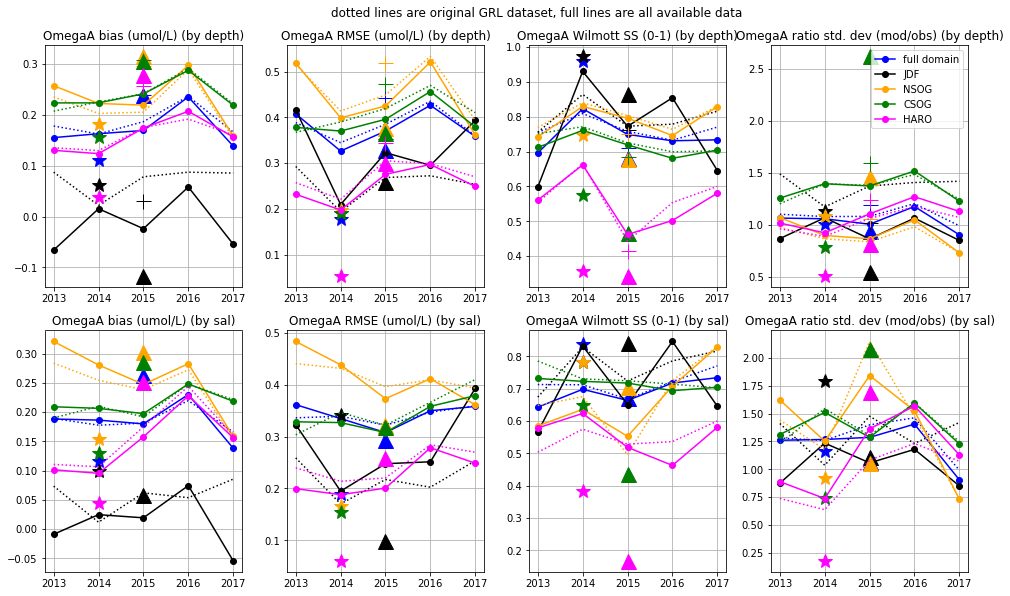

In [19]:
#arrays for storing metrics - first dimension is year, second is region (1-4 is JDF/NSOG/CSOG/HARO, 5 is overall)
reg_cols = ['blue','k', 'orange','green', 'fuchsia',  ]
plotabs = [OmegaA_bias_COMB_ds, OmegaA_RMSE_COMB_ds, OmegaA_WSS_COMB_ds, OmegaA_stdrat_MtoO_COMB_ds,\
           OmegaA_bias_COMB_ss, OmegaA_RMSE_COMB_ss, OmegaA_WSS_COMB_ss, OmegaA_stdrat_MtoO_COMB_ss]
plotabs_GRL = [OmegaA_bias_GRL_ds, OmegaA_RMSE_GRL_ds, OmegaA_WSS_GRL_ds, OmegaA_stdrat_MtoO_GRL_ds,\
           OmegaA_bias_GRL_ss, OmegaA_RMSE_GRL_ss, OmegaA_WSS_GRL_ss, OmegaA_stdrat_MtoO_GRL_ss]
plotabs_D14 = [df_2014_D14_ds['OmegaA_bias'],df_2014_D14_ds['OmegaA_RMSE'],df_2014_D14_ds['OmegaA_WSS'],\
              df_2014_D14_ds['OmegaA_stdrat_MtoO'],df_2014_D14_ss['OmegaA_bias'],df_2014_D14_ss['OmegaA_RMSE'],\
               df_2014_D14_ss['OmegaA_WSS'],df_2014_D14_ss['OmegaA_stdrat_MtoO']]
plotabs_D15 = [df_2015_D15_ds['OmegaA_bias'],df_2015_D15_ds['OmegaA_RMSE'],df_2015_D15_ds['OmegaA_WSS'],\
              df_2015_D15_ds['OmegaA_stdrat_MtoO'],df_2015_D15_ss['OmegaA_bias'],df_2015_D15_ss['OmegaA_RMSE'],\
               df_2015_D15_ss['OmegaA_WSS'],df_2015_D15_ss['OmegaA_stdrat_MtoO']]
plotabs_COMB_BR3 = [df_2015BR3_COMB_ds['OmegaA_bias'],df_2015BR3_COMB_ds['OmegaA_RMSE'],df_2015BR3_COMB_ds['OmegaA_WSS'],\
              df_2015BR3_COMB_ds['OmegaA_stdrat_MtoO'],np.nan, np.nan, np.nan, np.nan]
reglabs = ['full domain','JDF','NSOG','CSOG','HARO',]
titles = ['OmegaA bias (umol/L) (by depth)','OmegaA RMSE (umol/L) (by depth)',
          'OmegaA Wilmott SS (0-1) (by depth)','OmegaA ratio std. dev (mod/obs) (by depth)',
          'OmegaA bias (umol/L) (by sal)', \
           'OmegaA RMSE (umol/L) (by sal)',\
           'OmegaA Wilmott SS (0-1) (by sal)',
          'OmegaA ratio std. dev (mod/obs) (by sal)']
#plotabs = ['bias','bias']
yrs = np.arange(2013,2018,1)
fact = 0.6
fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,8):

    for y in range(0,5):
        pt = plotabs[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], marker = 'o', label = reglabs[y], linestyle = '-')
        pt = plotabs_GRL[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], linestyle = ':')
        pt = plotabs_D14[i]
        axs[i].plot(2014,pt[y],color = reg_cols[y], marker = '*',markersize = 15)
        pt = plotabs_D15[i]
        axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '^',markersize = 15) 
        if i <4:
            pt = plotabs_COMB_BR3[i]
            
            axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '+',markersize = 15) 
#         axs[i].set_xticks(yrs)
        axs[i].grid(); axs[i].set_title(titles[i])
    
    if i == 3:
        axs[i].legend(ncol =1, bbox_to_anchor = [1,1])

plt.suptitle('dotted lines are original GRL dataset, full lines are all available data')
plt.tight_layout()

plt.savefig('./extracted_calculated/OmegaA_stats.jpg')

In [5]:
OmegaA_bias_COMB_ds

array([[ 0.15509882,  0.16273844,  0.16911852,  0.23509242,  0.13839658],
       [-0.06587421,  0.01532919, -0.02387407,  0.05802085, -0.0543564 ],
       [ 0.25711746,  0.22217787,  0.21891705,  0.29706461,  0.15845676],
       [ 0.22332022,  0.22336198,  0.24112335,  0.28736639,  0.21866187],
       [ 0.13008573,  0.12356421,  0.17399957,  0.20682807,  0.15640678]])

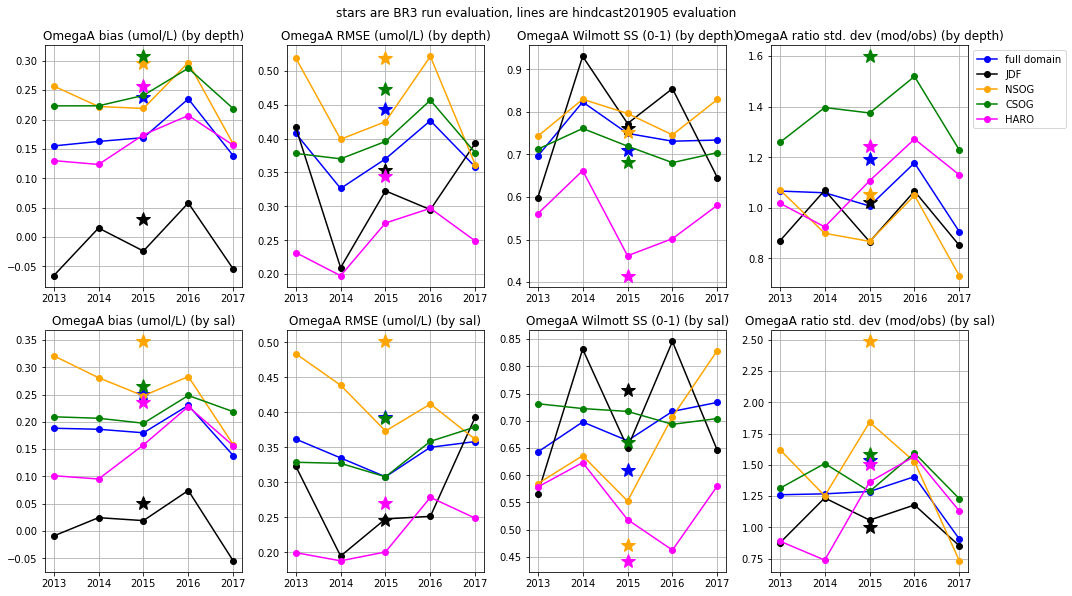

In [21]:
#arrays for storing metrics - first dimension is year, second is region (1-4 is JDF/NSOG/CSOG/HARO, 5 is overall)
reg_cols = ['blue','k', 'orange','green', 'fuchsia',  ]
plotabs = [OmegaA_bias_COMB_ds, OmegaA_RMSE_COMB_ds, OmegaA_WSS_COMB_ds, OmegaA_stdrat_MtoO_COMB_ds,\
           OmegaA_bias_COMB_ss, OmegaA_RMSE_COMB_ss, OmegaA_WSS_COMB_ss, OmegaA_stdrat_MtoO_COMB_ss]
plotabs_GRL = [OmegaA_bias_GRL_ds, OmegaA_RMSE_GRL_ds, OmegaA_WSS_GRL_ds, OmegaA_stdrat_MtoO_GRL_ds,\
           OmegaA_bias_GRL_ss, OmegaA_RMSE_GRL_ss, OmegaA_WSS_GRL_ss, OmegaA_stdrat_MtoO_GRL_ss]
plotabs_D14 = [df_2014_D14_ds['OmegaA_bias'],df_2014_D14_ds['OmegaA_RMSE'],df_2014_D14_ds['OmegaA_WSS'],\
              df_2014_D14_ds['OmegaA_stdrat_MtoO'],df_2014_D14_ss['OmegaA_bias'],df_2014_D14_ss['OmegaA_RMSE'],\
               df_2014_D14_ss['OmegaA_WSS'],df_2014_D14_ss['OmegaA_stdrat_MtoO']]
plotabs_D15 = [df_2015_D15_ds['OmegaA_bias'],df_2015_D15_ds['OmegaA_RMSE'],df_2015_D15_ds['OmegaA_WSS'],\
              df_2015_D15_ds['OmegaA_stdrat_MtoO'],df_2015_D15_ss['OmegaA_bias'],df_2015_D15_ss['OmegaA_RMSE'],\
               df_2015_D15_ss['OmegaA_WSS'],df_2015_D15_ss['OmegaA_stdrat_MtoO']]
plotabs_COMB_BR3 = [df_2015BR3_COMB_ds['OmegaA_bias'],df_2015BR3_COMB_ds['OmegaA_RMSE'],df_2015BR3_COMB_ds['OmegaA_WSS'],\
              df_2015BR3_COMB_ds['OmegaA_stdrat_MtoO'],df_2015BR3_COMB_ss['OmegaA_bias'],df_2015BR3_COMB_ss['OmegaA_RMSE'],df_2015BR3_COMB_ss['OmegaA_WSS'],\
              df_2015BR3_COMB_ss['OmegaA_stdrat_MtoO']]
reglabs = ['full domain','JDF','NSOG','CSOG','HARO',]
titles = ['OmegaA bias (umol/L) (by depth)','OmegaA RMSE (umol/L) (by depth)',
          'OmegaA Wilmott SS (0-1) (by depth)','OmegaA ratio std. dev (mod/obs) (by depth)',
          'OmegaA bias (umol/L) (by sal)', \
           'OmegaA RMSE (umol/L) (by sal)',\
           'OmegaA Wilmott SS (0-1) (by sal)',
          'OmegaA ratio std. dev (mod/obs) (by sal)']
#plotabs = ['bias','bias']
yrs = np.arange(2013,2018,1)
fact = 0.6
fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,8):

    for y in range(0,5):
        pt = plotabs[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], marker = 'o', label = reglabs[y], linestyle = '-')
#         pt = plotabs_GRL[i]
#         axs[i].plot(yrs,pt[y,:],color = reg_cols[y], linestyle = ':')
#         pt = plotabs_D14[i]
#         axs[i].plot(2014,pt[y],color = reg_cols[y], marker = '*',markersize = 15)
#         pt = plotabs_D15[i]
#         axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '^',markersize = 15) 
#         if i <4:
        pt = plotabs_COMB_BR3[i]

        axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '*',markersize = 15) 
#         axs[i].set_xticks(yrs)
        axs[i].grid(); axs[i].set_title(titles[i])
    
    if i == 3:
        axs[i].legend(ncol =1, bbox_to_anchor = [1,1])

plt.suptitle('stars are BR3 run evaluation, lines are hindcast201905 evaluation')
plt.tight_layout()

plt.savefig('./extracted_calculated/OmegaA_stats_BR3.jpg')